In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 1
# system of linear equations solver
# a1x1 + b1 x2 = c1
# a2x1 + b2 x2 = c2
# X + Y  = 6
# 3X + 2y = 16

In [3]:
class System:
    def __init__(self, lhs_coeffs, rhs_consts):
        self.lhs_coeffs = np.array(lhs_coeffs)
        self.rhs_consts = np.array(rhs_consts)
        self.linex = np.linspace(-5,5,100)
        self.ans = self.solve()

    def solve(self):
        return np.linalg.solve(self.lhs_coeffs, self.rhs_consts)

    def getSolution(self):
        print(f"Values of X and Y are: {self.ans[0], self.ans[1]}")

    def plot(self):
        Ylist = list()

        for i, rhsval in enumerate(self.rhs_consts):
            Ylist.append((rhsval-self.lhs_coeffs[i][0]*self.linex)/self.lhs_coeffs[i][1])
            print(rhsval, self.lhs_coeffs[i][0], self.lhs_coeffs[i][1])

        for i,Yval in enumerate(Ylist):
            plt.plot(self.linex, Yval, label=f"{self.lhs_coeffs[i][0]}x+{self.lhs_coeffs[i][1]}y= {self.rhs_consts[i]}")

        plt.legend(loc='upper left')
        plt.show()

In [4]:
lhs = [[1, 1], [3, 2]]
rhs = [6, 16]
s1 = System(lhs, rhs)

In [5]:
s1.getSolution()

Values of X and Y are: (4.0, 2.0000000000000004)


6 1 1
16 3 2


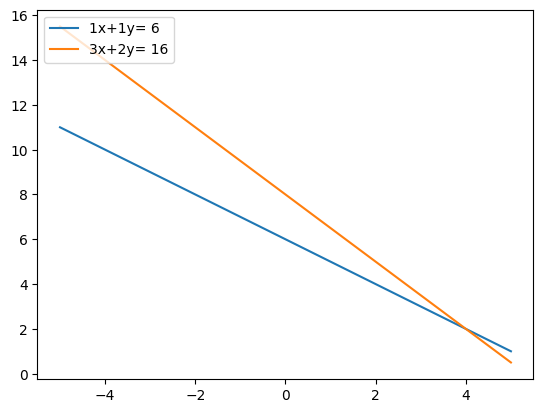

In [6]:
s1.plot()

In [7]:
lhs2 = [[1, 1], [3, 3]]
rhs2 = [5, 12]

s2 = System(lhs2, rhs2)

LinAlgError: Singular matrix

In [ ]:
s2.getSolution()

In [ ]:
s2.plot()

In [8]:
lhs3 = [[1, 1], [3, 3]]
rhs3 = [6, 18]

s3 = System(lhs3, rhs3)

LinAlgError: Singular matrix

In [ ]:
s3.getSolution()

In [ ]:
s3.plot()

In [9]:
# 3 Plot the functions
from sympy import *

In [10]:
x, y = symbols('x y')
f1 = x**2
f2 = x**3
f3 = x*log(x)

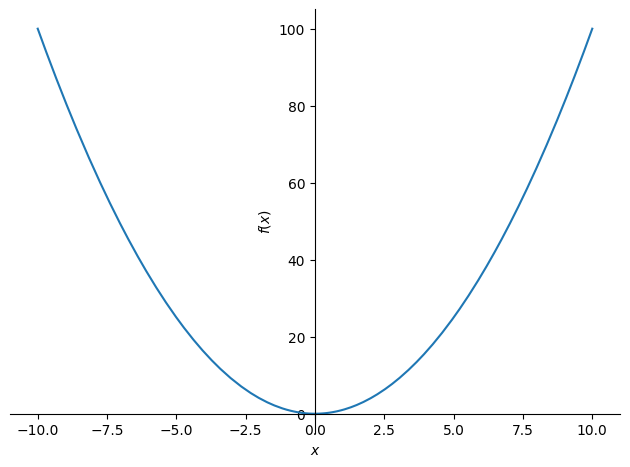

In [11]:
plotting.plot(f1)

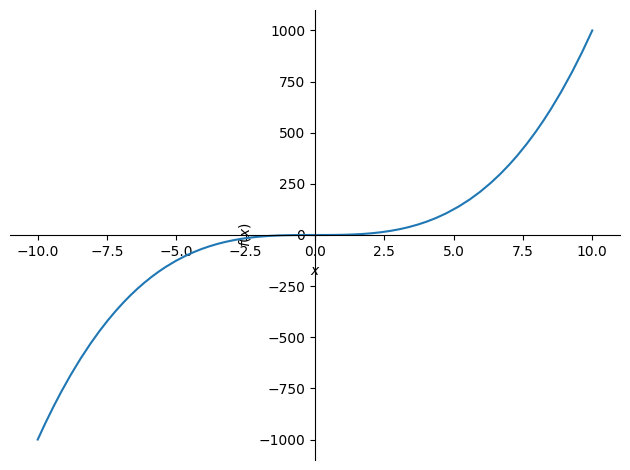

In [12]:
plotting.plot(f2)

In [13]:
f1prime = Derivative(f1, x).doit()
f1prime2 = Derivative(f1prime, x).doit()
print(f"Second ord. derivative:{f1prime2}, Range of Convexity: {solveset(f1prime2>0, x, Reals)}, Range of Concavity: {solveset(f1prime2<0, x, Reals)}")

Second ord. derivative:2, Range of Convexity: Reals, Range of Concavity: EmptySet


In [14]:
f2prime = Derivative(f2, x).doit()
f2prime2 = Derivative(f2prime, x).doit()
print(f"Second ord. derivative:{f2prime2}, Range of Convexity: {solveset(f2prime2>0, x, Reals)}, Range of Concavity: {solveset(f2prime2<0, x, Reals)}")

Second ord. derivative:6*x, Range of Convexity: Interval.open(0, oo), Range of Concavity: Interval.open(-oo, 0)


In [15]:
f3prime = Derivative(f3, x).doit()
f3prime2 = Derivative(f3prime, x).doit()
print(f"Second ord. derivative:{f3prime2}, Range of Convexity: {solveset(f3prime2>0, x, Reals)}, Range of Concavity: {solveset(f3prime2<0, x, Reals)}")

Second ord. derivative:1/x, Range of Convexity: Interval.open(0, oo), Range of Concavity: Interval.open(-oo, 0)


In [16]:
# f(x) = mod(x)
f4prime = Derivative(x, x).doit()
f4prime2 = Derivative(f4prime, x).doit()
print(f"Second ord. derivative:{f4prime2}, Range of Convexity: {solveset(f4prime2>0, x, Reals)}, Range of Concavity: {solveset(f4prime2<0, x, Reals)}")
f4prime = Derivative(-x, x).doit()
f4prime2 = Derivative(f4prime, x).doit()
print(f"Second ord. derivative:{f4prime2}, Range of Convexity: {solveset(f4prime2>0, x, Reals)}, Range of Concavity: {solveset(f4prime2<0, x, Reals)}")

Second ord. derivative:0, Range of Convexity: EmptySet, Range of Concavity: EmptySet
Second ord. derivative:0, Range of Convexity: EmptySet, Range of Concavity: EmptySet


In [17]:
# 4

In [55]:
class Matrix:
    def __init__(self, mat):
        self.mat = np.array(mat)
        self.rank = np.linalg.matrix_rank(self.mat)
        self.isSquare = self.find_squarity()
        self.det = self.calc_det()
        self.transpose = self.mat.T
        self.inverse = self.calc_inverse()
        self.isOrthogonal = self.find_orthogonality()
        self.cov_mat = self.calc_covmatrix()
        self.corr_mat = self.calc_corrmatrix()

    def find_squarity(self):
        if len(set(self.mat.shape))==1:
            return True
        return False

    def calc_det(self):
        if self.isSquare:
            return np.linalg.det(self.mat)
        return None

    def calc_inverse(self):
        if self.det:
            return np.linalg.inv(self.mat)
        return None

    def find_orthogonality(self):
        if self.det:
            if np.all(self.transpose == self.inverse):
                return True
            else:
                return False
        return None

    def calc_covmatrix(self):
        # if self.isSquare:
        return np.cov(self.mat)
        return None

    def calc_corrmatrix(self):
        # if self.isSquare:
        return np.corrcoef(self.transpose)
        return None

    def display_attr(self):
        print(f"The matrix")
        for row in self.mat:
            print(row)

        print(f"Rank: {self.rank}, Det: {self.det}")

        print(f"The transpose")

        for row in self.transpose:
            print(row)

        print(f"The inverse")
        if self.det:
          for row in self.inverse:
              print(row)

        print(f"Orthogonality : {self.isOrthogonal}")

        print(f"Covariance Matrix")

        # if self.isSquare:
        for row in self.cov_mat:
            print(row)

        print(f"Correlation Matrix")

        # if self.isSquare:
        for row in self.corr_mat:
            print(row)

        print(". . .")

In [22]:
A1 = [[1, 0, 0],[0, 1, 0],[0, 0, 1]]

In [23]:
A2 = [[1, 2, 3],[4, 5, 6],[7, 8, 9]]

In [24]:
A3 = [[1, 2, 3],[2, 4, 5],[3, 5, 6]]

In [25]:
A4 = [[1, 2, 3, 4],[5, 6, 7, 8],[9, 10, 11, 12]]

In [60]:
m1 = Matrix(A1)
m1.display_attr()

The matrix
[1 0 0]
[0 1 0]
[0 0 1]
Rank: 3, Det: 1.0
The transpose
[1 0 0]
[0 1 0]
[0 0 1]
The inverse
[1. 0. 0.]
[0. 1. 0.]
[0. 0. 1.]
Orthogonality : True
Covariance Matrix
[ 0.33333333 -0.16666667 -0.16666667]
[-0.16666667  0.33333333 -0.16666667]
[-0.16666667 -0.16666667  0.33333333]
Correlation Matrix
[ 1.  -0.5 -0.5]
[-0.5  1.  -0.5]
[-0.5 -0.5  1. ]
. . .


In [61]:
m2 = Matrix(A2)
m2.display_attr()

The matrix
[1 2 3]
[4 5 6]
[7 8 9]
Rank: 2, Det: 0.0
The transpose
[1 4 7]
[2 5 8]
[3 6 9]
The inverse
Orthogonality : None
Covariance Matrix
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
Correlation Matrix
[1. 1. 1.]
[1. 1. 1.]
[1. 1. 1.]
. . .


In [62]:
m3 = Matrix(A3)
m3.display_attr()

The matrix
[1 2 3]
[2 4 5]
[3 5 6]
Rank: 3, Det: -1.0000000000000007
The transpose
[1 2 3]
[2 4 5]
[3 5 6]
The inverse
[ 1. -3.  2.]
[-3.  3. -1.]
[ 2. -1.  0.]
Orthogonality : False
Covariance Matrix
[1.  1.5 1.5]
[1.5        2.33333333 2.33333333]
[1.5        2.33333333 2.33333333]
Correlation Matrix
[1.         0.98198051 0.98198051]
[0.98198051 1.         1.        ]
[0.98198051 1.         1.        ]
. . .


In [63]:
m4 = Matrix(A4)
m4.display_attr()

The matrix
[1 2 3 4]
[5 6 7 8]
[ 9 10 11 12]
Rank: 2, Det: None
The transpose
[1 5 9]
[ 2  6 10]
[ 3  7 11]
[ 4  8 12]
The inverse
Orthogonality : None
Covariance Matrix
[1.66666667 1.66666667 1.66666667]
[1.66666667 1.66666667 1.66666667]
[1.66666667 1.66666667 1.66666667]
Correlation Matrix
[1. 1. 1. 1.]
[1. 1. 1. 1.]
[1. 1. 1. 1.]
[1. 1. 1. 1.]
. . .
